# Белозеров Д.С. ИУ5-64Б

## Вариант 1

## Здадание

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Импорт библиотек

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка данных и их предварительный осмотр

In [6]:
# Загрузка данных Iris
iris = load_iris()
X = iris.data
y = iris.target

# Преобразование данных в DataFrame для удобства анализа
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

# Показ первых нескольких строк датасета
print(iris_df.head())

# Общая информация о датасете
print(iris_df.info())

# Основные статистики
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes:

Исследование основных статистик и распределения признаков

species
0    50
1    50
2    50
Name: count, dtype: int64


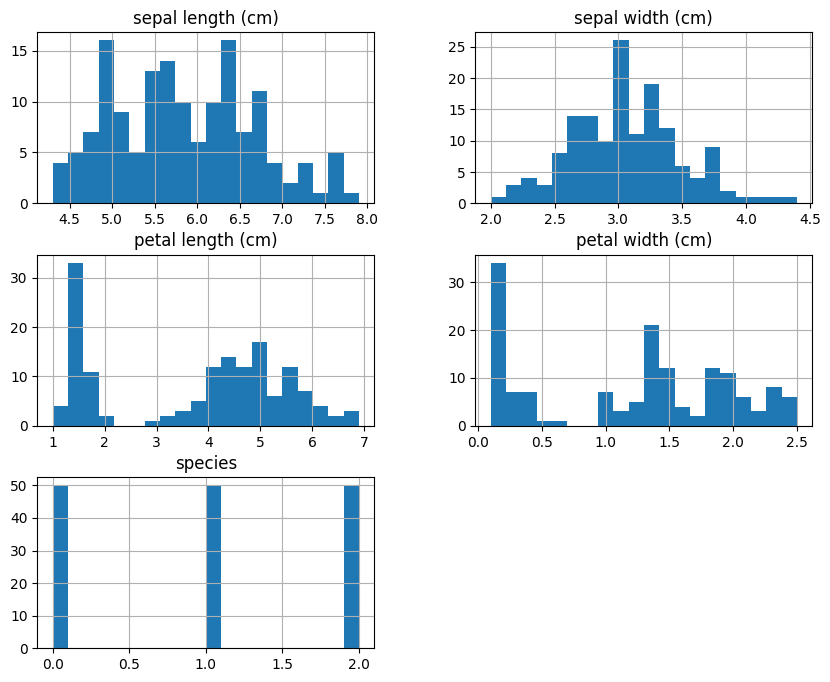

In [7]:
# Распределение классов
print(iris_df['species'].value_counts())

# Гистограммы распределения признаков
iris_df.hist(bins=20, figsize=(10, 8))
plt.show()


Визуализация данных

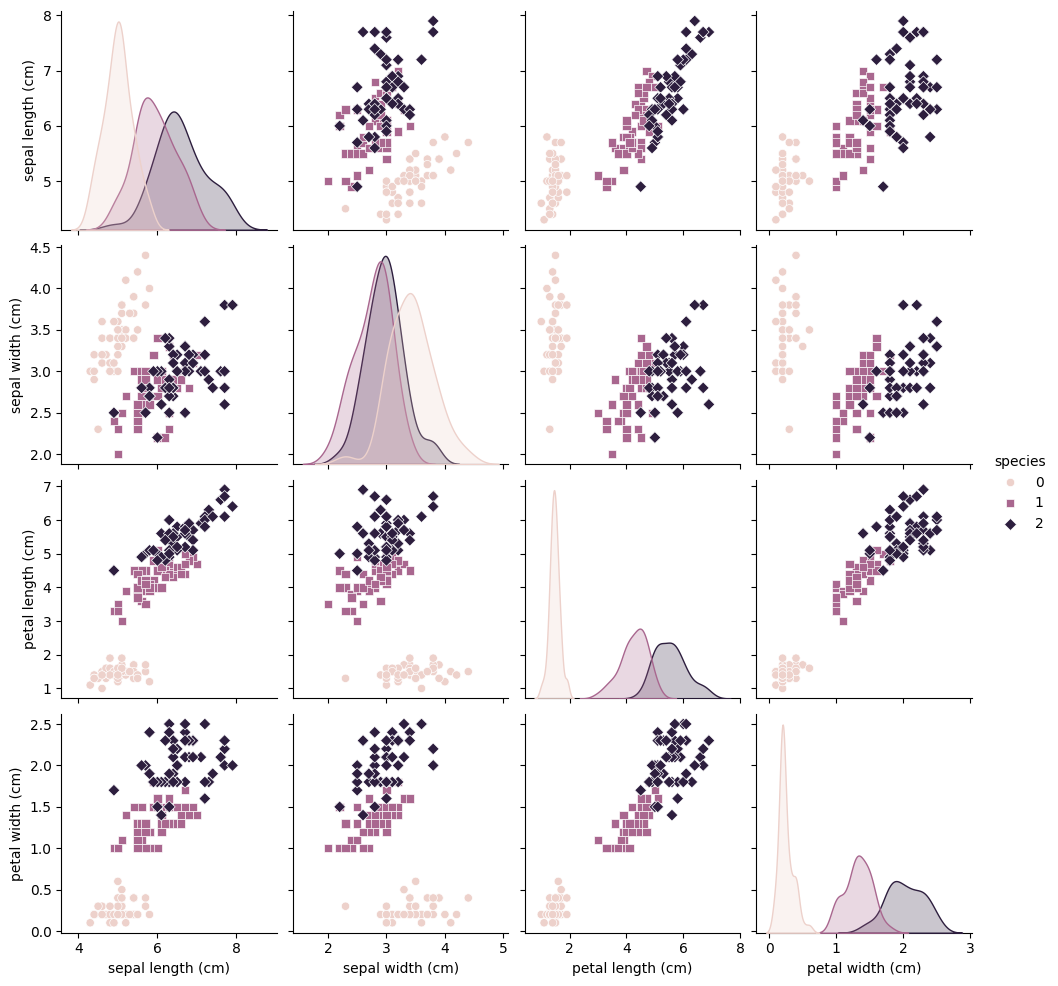

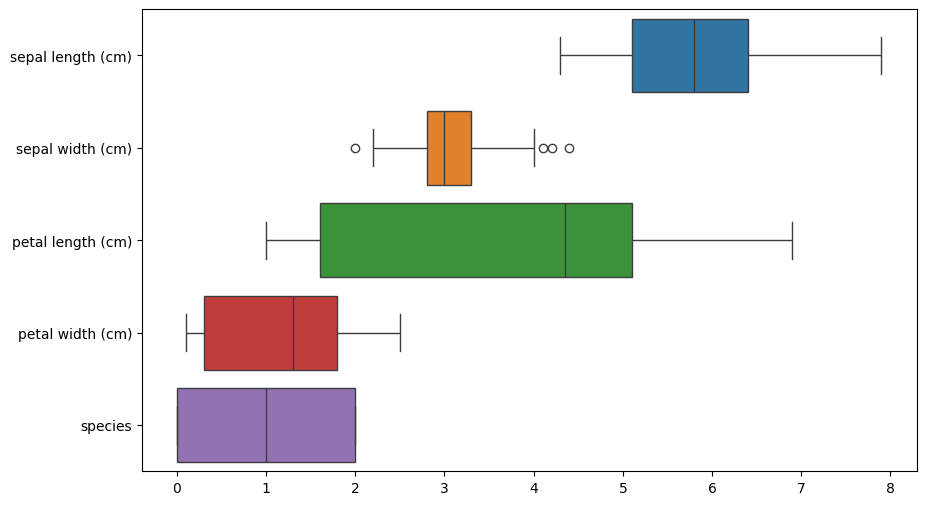

In [8]:
# Pairplot для визуализации распределения признаков и их взаимосвязей
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

# Boxplot для выявления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, orient="h")
plt.show()


Анализ корреляции признаков

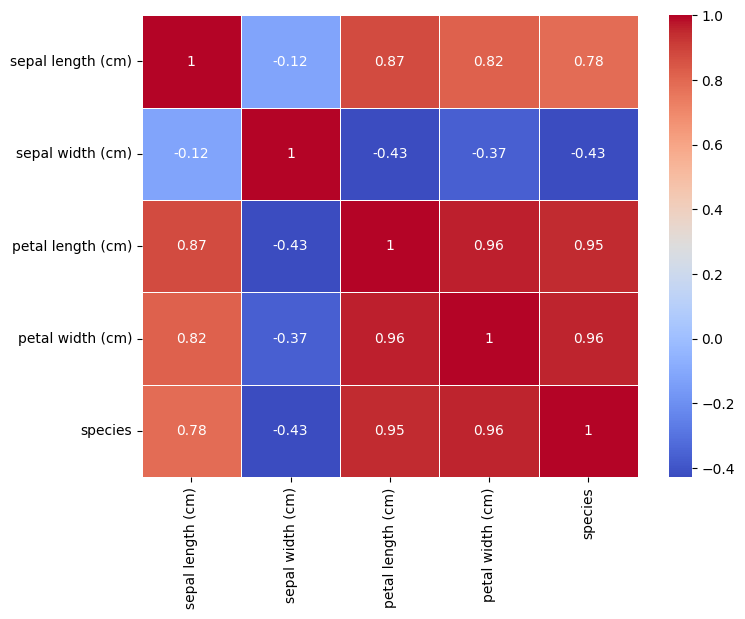

In [9]:
# Корреляционная матрица
corr_matrix = iris_df.corr()

# Тепловая карта корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


Разделение данных на обучающую и тестовую выборки и стандартизация

In [10]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Построение модели логистической регрессии

In [11]:
# Логистическая регрессия
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train, y_train)

# Прогнозирование
y_pred_log_reg = log_reg.predict(X_test)

# Оценка качества модели
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print(f"Accuracy логистической регрессии: {accuracy_log_reg:.4f}")
print(f"F1 Score логистической регрессии: {f1_log_reg:.4f}")


Accuracy логистической регрессии: 1.0000
F1 Score логистической регрессии: 1.0000


Построение модели градиентного бустинга

In [12]:
# Градиентный бустинг
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Прогнозирование
y_pred_gb = gb_clf.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print(f"Accuracy градиентного бустинга: {accuracy_gb:.4f}")
print(f"F1 Score градиентного бустинга: {f1_gb:.4f}")


Accuracy градиентного бустинга: 1.0000
F1 Score градиентного бустинга: 1.0000


## Вывод

- Датасет состоит из 150 экземпляров и 4 признаков (длина и ширина чашелистика и лепестка).
Датасет сбалансирован по классам (каждый класс представлен 50 экземплярами).

- Статистический анализ:
Все признаки имеют разные масштабы и распределения, что оправдывает необходимость стандартизации.
В данных нет пропусков, что упрощает обработку данных.

- Визуализация данных:
Pairplot показал, что классы довольно хорошо разделены, особенно по признакам лепестков.
Boxplot выявил, что значимых выбросов нет.

- Корреляционный анализ:
Некоторые признаки сильно коррелируют друг с другом, например, длина и ширина лепестка. Это может быть полезно для моделей, использующих линейные зависимости.


Обе модели показывают отличные результаты на тестовых данных, равными 1.0, что указывает на то, что модели прекрасно справляются с задачей классификации данного набора данных и данные датасета Iris хорошо структурированы, содержат четко выраженные границы между классами.